<a href="https://colab.research.google.com/github/MAgustin1/comp_vision_1/blob/main/TP2_Morel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy import signal
import scipy.stats as st
import math

# Parte 1

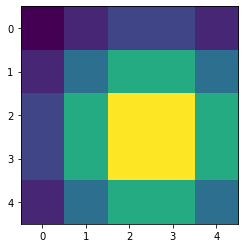

In [94]:
size=5
sigma=1.5
kernel1=np.zeros((size,size))
for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-(size/2))**2+(j-(size/2))**2)
          kernel1[i,j]=np.exp(-(diff**2)/(2*sigma**2))

plt.imshow(kernel1)


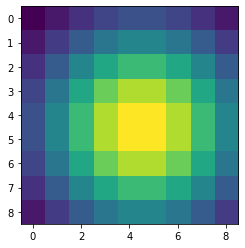

In [95]:
size=9
sigma=3
kernel2=np.zeros((size,size))
for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-(size/2))**2+(j-(size/2))**2)
          kernel2[i,j]=np.exp(-(diff**2)/(2*sigma**2))

plt.imshow(kernel2)

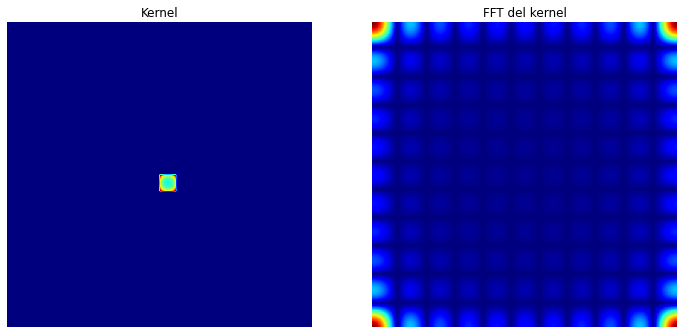

In [93]:
def get_gauss_kernel_a(size=5,sigma=1.5):
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-(int)(size/2))**2+(j-(int)(size/2))**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)
def create_gauss_filter_a(h, w, k_size=7, sigma=3):
    filter = get_gauss_kernel_b(k_size, sigma)
    output = np.zeros((h,w))
    output[int(h/2):int(h/2) + k_size, int(w/2):int(w/2) + k_size] = filter

    return output, np.fft.fft2(output)

kernel, kernel_fft = create_gauss_filter_a(200, 200, k_size=11, sigma=5)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(abs(np.fft.fft2(kernel)), cmap='jet')


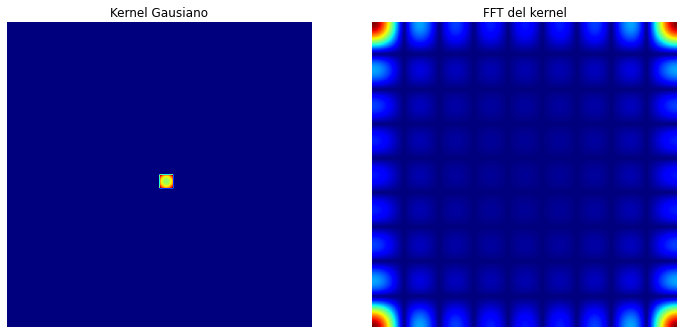

In [55]:
def get_gauss_kernel_b(size=3,sigma=1):
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-(int)(size/2))**2+(j-(int)(size/2))**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))

    kernel = np.sum(kernel)/kernel
    return kernel / np.sum(kernel)

def create_gauss_filter_b(h, w, k_size=17, sigma=3):
    filter = get_gauss_kernel_b(k_size, sigma)
    output = np.zeros((h,w))
    output[int(h/2):int(h/2) + k_size, int(w/2):int(w/2) + k_size] = filter

    return output, np.fft.fft2(output)

kernel, kernel_fft = create_gauss_filter_b(200, 200, k_size=9, sigma=5)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(np.abs(kernel_fft), cmap='jet')
plt.show()

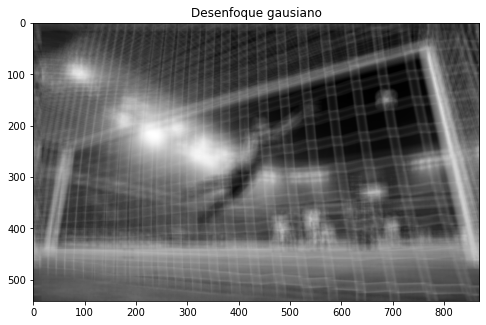

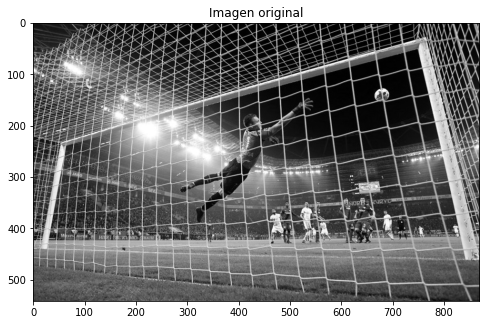

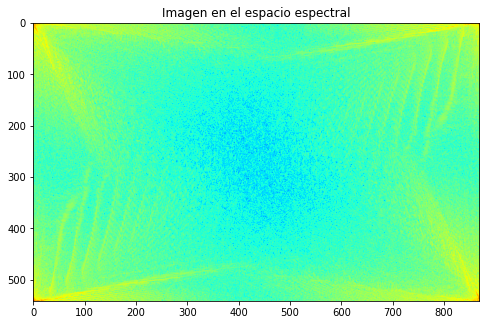

In [83]:
img = cv.imread('golazo.jpg', 0)

img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_fft
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

img_fft = np.fft.fft2(img)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(20*np.log(np.abs(img_fft)), cmap='jet')
plt.title('Imagen en el espacio espectral')
plt.show()

k_size: 3 - sigma: 3


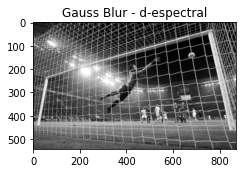

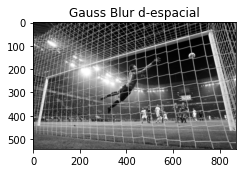

k_size: 3 - sigma: 5


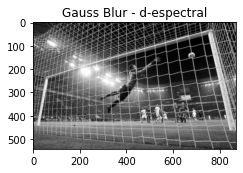

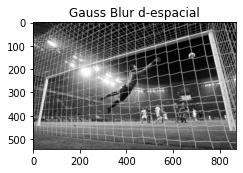

k_size: 9 - sigma: 3


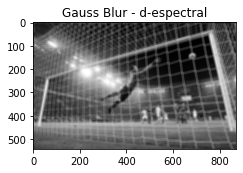

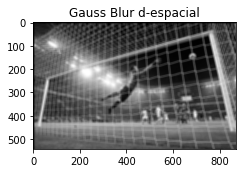

k_size: 9 - sigma: 5


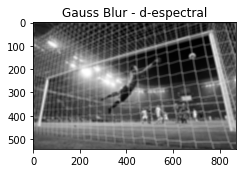

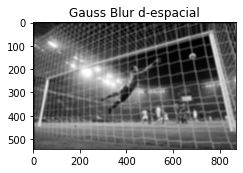

k_size: 15 - sigma: 3


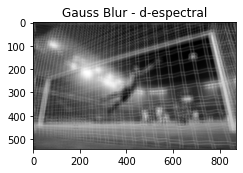

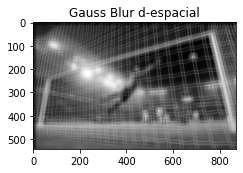

k_size: 15 - sigma: 5


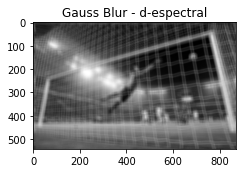

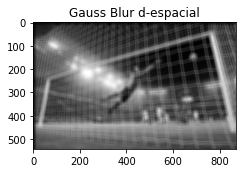

k_size: 19 - sigma: 3


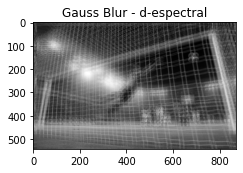

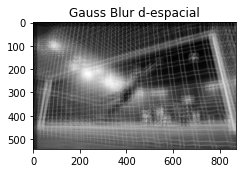

k_size: 19 - sigma: 5


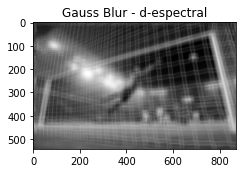

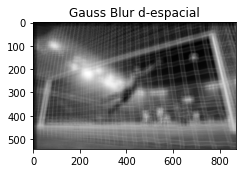

In [99]:
for k_size in [3, 9, 15, 19]:
    for sigma in [3,5]:
        kernel, kernel_fft = create_gauss_filter_b(img.shape[0], img.shape[1], k_size=k_size, sigma=sigma)
        print("k_size: " + str(k_size) + " - sigma: " + str(sigma))
        filtered = img_fft * kernel_fft
        spacial = signal.fftconvolve(img, kernel, mode='same')
        img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.imshow(img_gauss, cmap='gray')
        plt.title('Gauss Blur - d-espectral')
        plt.show()

        plt.figure(figsize=(8,8))
        plt.subplot(2,2,2)
        plt.imshow(spacial, cmap='gray')
        plt.title('Gauss Blur d-espacial')
        plt.show()

En las imagenes se puede osvervar como a medida que aumenta el sigma aumenta el blur y cuando aumenta el tamaño del kernel se pierden más los detalles.

# Parte 2

In [101]:
def freq(collection):
    d = {}; max_freq_index = -1;max_freq = -1
    for i in collection.flatten():
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
        if d[i] > max_freq:
            max_freq = d[i]
            max_freq_index = i 
    return max_freq_index

In [104]:
def IQ_measure(img):

    F = np.fft.fft2(img)
    FC = np.fft.ifftshift(F)
    AF = np.abs(FC)
    m = freq(AF)
    thres = m/1000
    th = len([x for x in F.flatten() if x > thres])
    img_shape = img.shape

    IQ_measure = th / (img_shape[0] * img_shape[1])

    return IQ_measure

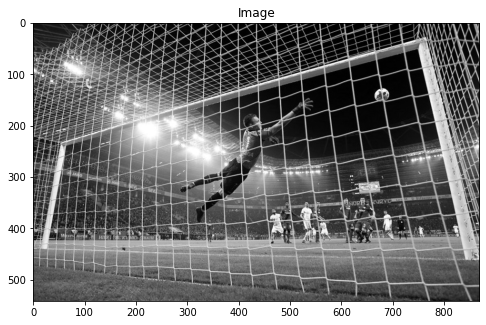

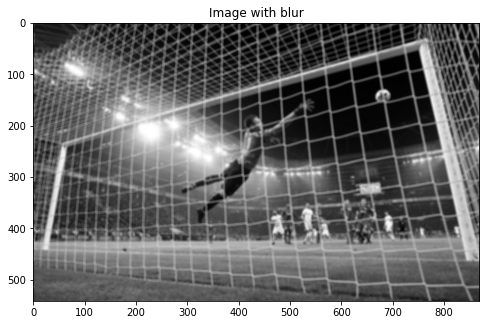

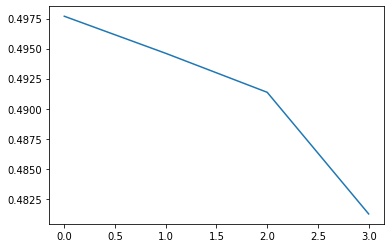

In [105]:
measures = []
img = cv.imread('golazo.jpg', 0)
measures.append(IQ_measure(img))

for sigma_i in [3,5,7]:
    kernel, kernel_tf = create_gauss_filter_b(img.shape[0], img.shape[1], k_size=5, sigma=sigma_i)

    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    
    measures.append(IQ_measure(img_gauss))


plt.figure(figsize=(8,8))

plt.imshow(img, cmap='gray')
plt.title('Image')
plt.show()
plt.figure(figsize=(8,8))

plt.imshow(img_gauss, cmap='gray')
plt.title('Image with blur')
plt.show()
plt.plot(measures)


En la grafica se puede ovservar que a medida que van aumentando los sigmas, la calidad de la imagen disminuye, por lo que las metricas y el difuminado de la imagen se corresponden.

# Parte 3